In [1]:
import pandas as pd
import numpy as np

import statistics as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
data = pd.read_csv('MPB-Dataset_Clean.csv')

In [4]:
data.head(5)

,target,listing_type,kitchen_type,building_condition,postcode,tenement_building,double_glazing,furnished,bathroom,m2,bedrooms,number_bedrooms
0,780,Apartment,Installed,Good,1190.0,No,Yes,Unknown,1.0,128,10,1
1,1350,Apartment,Installed,Good,1180.0,No,No,No,1.0,90,16,2
2,1280,Apartment,Hyper equipped,Good,1040.0,No,Yes,Unknown,1.0,90,16,2
3,1100,Apartment,Installed,Good,NaN,No,Yes,No,1.0,75,10,2
4,1040,Apartment,Hyper equipped,Good,1060.0,No,No,Yes,1.0,70,14,1


In [5]:
data.shape

(3180, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   target              3180 non-null   int64  
 1   listing_type        3180 non-null   object 
 2   kitchen_type        3180 non-null   object 
 3   building_condition  3180 non-null   object 
 4   postcode            2894 non-null   float64
 5   tenement_building   3180 non-null   object 
 6   double_glazing      3180 non-null   object 
 7   furnished           3180 non-null   object 
 8   bathroom            3180 non-null   float64
 9   m2                  3180 non-null   int64  
 10  bedrooms            3180 non-null   int64  
 11  number_bedrooms     3180 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 298.2+ KB


In [7]:
data_cat = data.select_dtypes(include = object)
data_num = data.select_dtypes(include = np.number)

In [8]:
data_cat_target = data.select_dtypes(include = object)
data_cat_target['target'] = data['target']

# Plot Settings

In [9]:
# sns.set_style("whitegrid")
sns.set_style("white")
# sns.set_style("dark")

# sns.color_palette()
# sns.color_palette("rocket", as_cmap=True)
sns.color_palette("rocket")

plt.figure(figsize = (6, 3))

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

# Plots - Numericals

In [10]:
# sns.pairplot(data_num)

In [11]:
# def catplot(df):
#     for column in df.columns:
#         sns.catplot(df, x=column, y='target', palette='deep')
#     return None

In [12]:
# catplot(data_num)

In [13]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           3180 non-null   int64  
 1   postcode         2894 non-null   float64
 2   bathroom         3180 non-null   float64
 3   m2               3180 non-null   int64  
 4   bedrooms         3180 non-null   int64  
 5   number_bedrooms  3180 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 149.2 KB


<Axes: xlabel='target', ylabel='Density'>

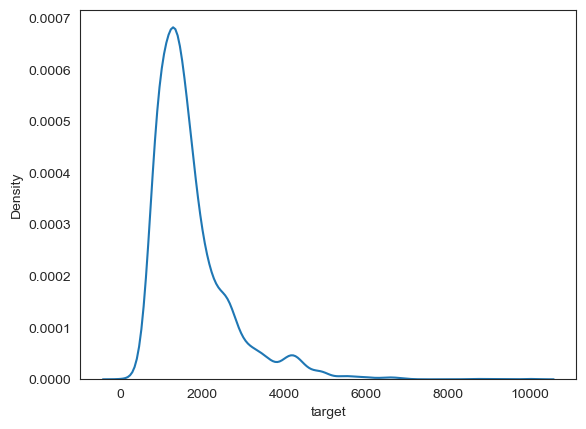

In [14]:
sns.kdeplot(data=data_num, x="target")

There must be outliers. Some of the properties can be offices or very big. I won´t consider those for the model, because there are not enough values.

<Axes: xlabel='m2', ylabel='Density'>

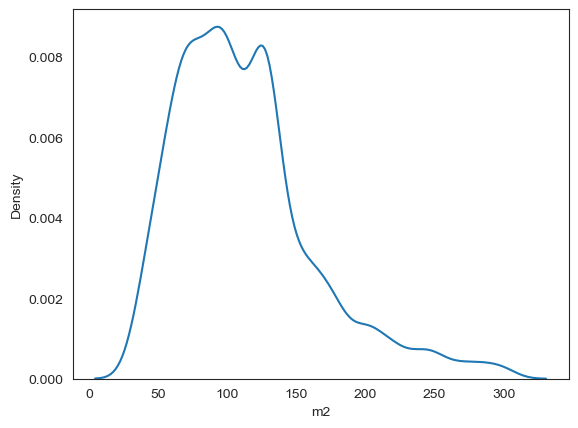

In [15]:
sns.kdeplot(data=data_num, x="m2")

In [16]:
test = data[(data['m2']>=35)]
test.shape

(3180, 12)

I have removed those rows where m2 > 300. Only 100 rows.

In [18]:
# sns.displot(data=data_num, x="floor", discrete=True)

In [20]:
# test = data[(data['floor']<=12)]
# test.shape

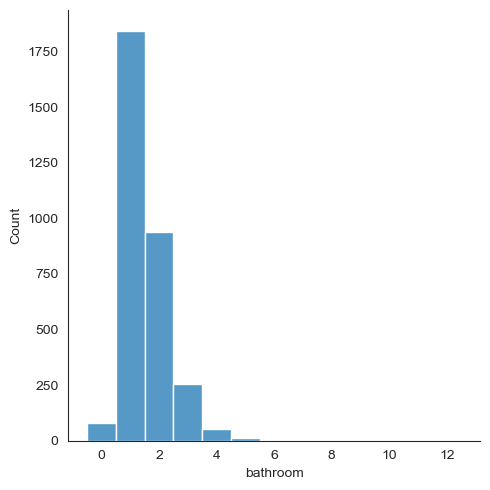

In [21]:
sns.displot(data=data_num, x="bathroom", discrete=True)

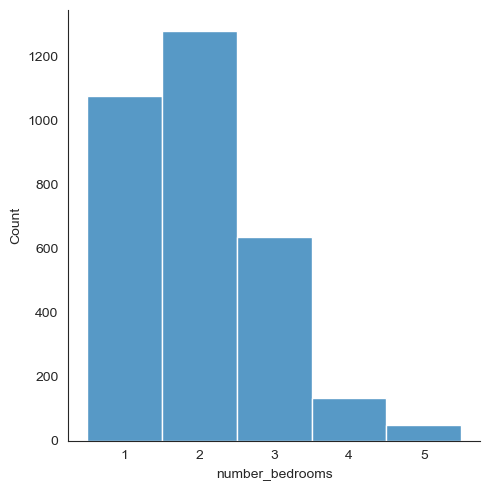

In [22]:
sns.displot(data=data_num, x="number_bedrooms", discrete=True)

In [23]:
test = data[(data['number_bedrooms']<=5)]
test.shape

(3180, 12)

In [25]:
# sns.kdeplot(data=data_num, x="primary_energy_consumption")

In [27]:
# test = data[(data['primary_energy_consumption']<=1500)]
# test.shape

In [29]:
# sns.kdeplot(data=data_num, x="co2_emission")

In [31]:
# test = data[(data['co2_emission']<=300)]
# test.shape

# Plots - Categorical

In [32]:
data_cat_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   listing_type        3180 non-null   object
 1   kitchen_type        3180 non-null   object
 2   building_condition  3180 non-null   object
 3   tenement_building   3180 non-null   object
 4   double_glazing      3180 non-null   object
 5   furnished           3180 non-null   object
 6   target              3180 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 174.0+ KB


In [34]:
# sns.boxplot(data=data_cat_target, x='municipality', y='target', palette='rocket')

In [35]:
test = data[(data['target']<=9000)]
test.shape

(3178, 12)

In [37]:
# sns.boxplot(data_cat_target, x='street', y='target', palette='rocket')

<Axes: xlabel='listing_type', ylabel='target'>

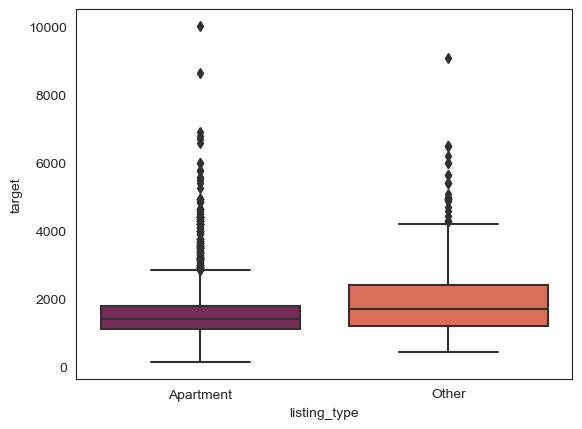

In [38]:
sns.boxplot(data_cat_target, x='listing_type', y='target', palette='rocket')

<Axes: xlabel='kitchen_type', ylabel='target'>

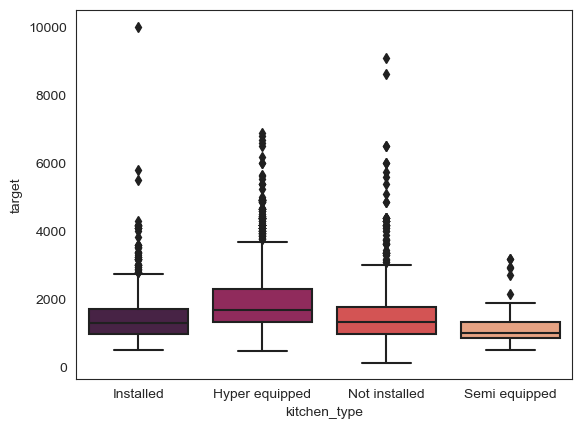

In [39]:
sns.boxplot(data_cat_target, x='kitchen_type', y='target', palette='rocket')

In [40]:
test = data[(data['target']<=8000)]
test.shape

(3177, 12)

<Axes: xlabel='building_condition', ylabel='target'>

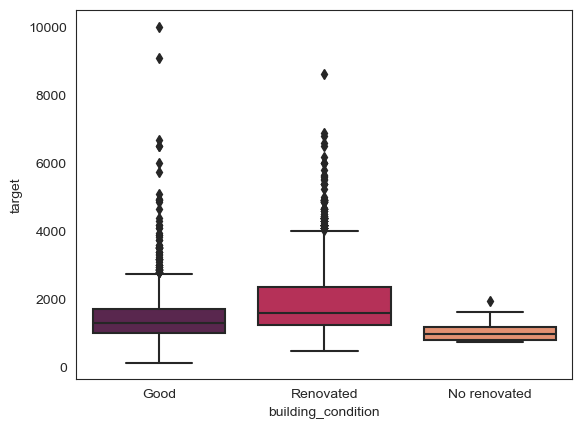

In [41]:
sns.boxplot(data_cat_target, x='building_condition', y='target', palette='rocket')

In [43]:
# sns.boxplot(data_cat_target, y='postcode', x='target', palette='rocket')

In [44]:
test = data[(data['target']<=6000)]
test.shape

(3169, 12)

<Axes: xlabel='double_glazing', ylabel='target'>

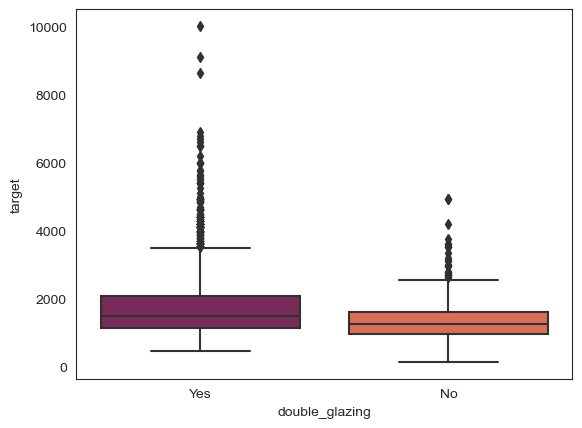

In [45]:
sns.boxplot(data_cat_target, x='double_glazing', y='target', palette='rocket')

In [47]:
# sns.boxplot(data_cat_target, x='swimming_pool', y='target', palette='rocket')

In [49]:
# sns.boxplot(data_cat_target, x='dining_room', y='target', palette='rocket')

In [51]:
# sns.boxplot(data_cat_target, x='laundry_room', y='target', palette='rocket')

In [53]:
# sns.boxplot(data_cat_target, x='basement', y='target', palette='rocket')

In [55]:
# sns.boxplot(data_cat_target, x='air_conditioning', y='target', palette='rocket')

In [57]:
# pd.crosstab(data_cat_target['street'], data_cat_target['postcode'])